Files already downloaded and verified


C:\Users\viniv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\viniv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


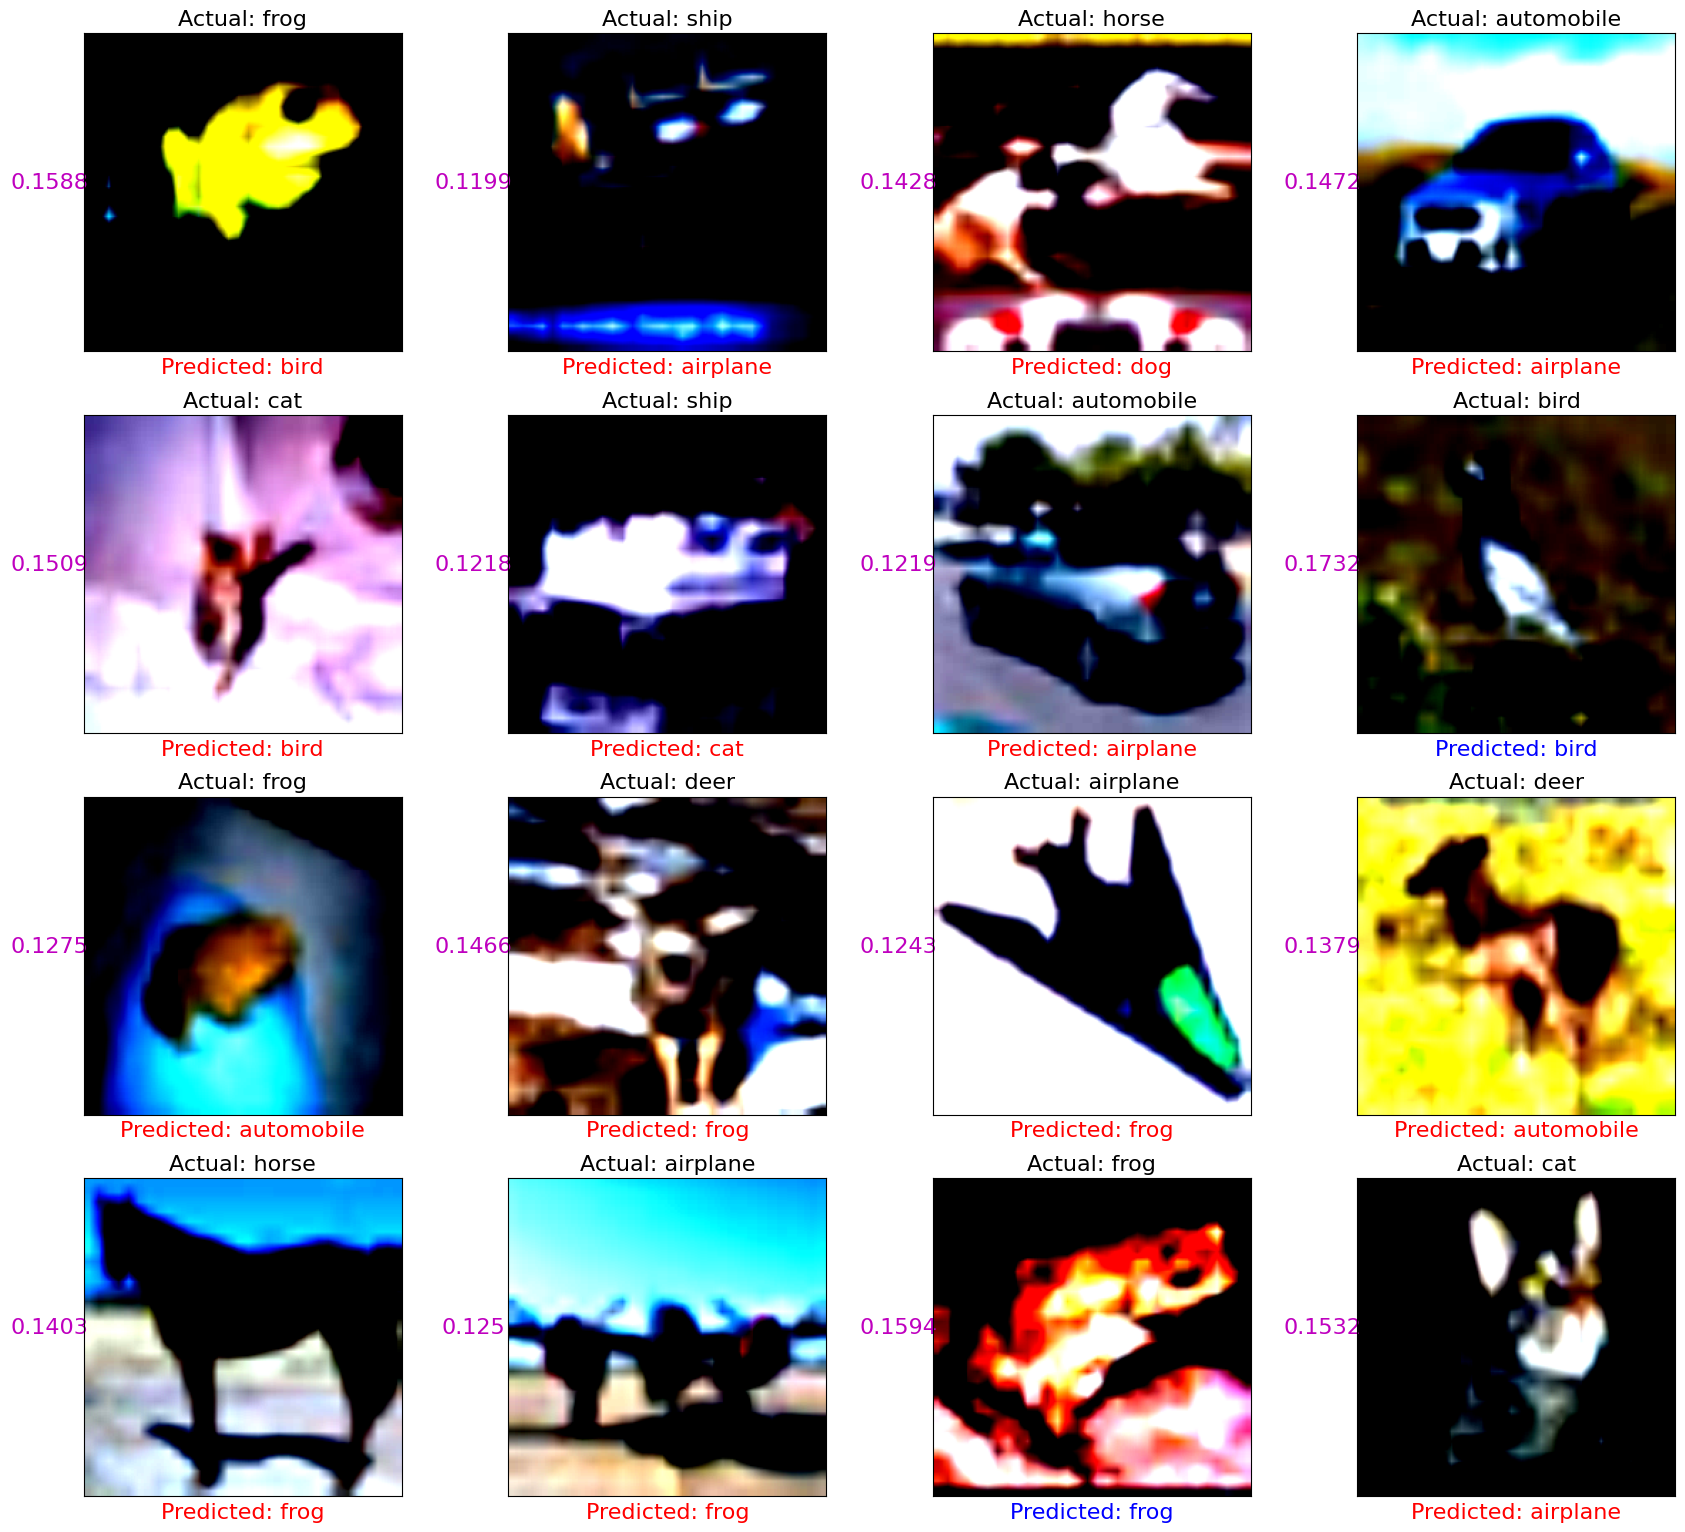

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from torchvision import models
import torch
import torchvision.datasets as datasets
from torchinfo import summary

transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_dataset = datasets.CIFAR10('./data_src', train=False, download=True, transform=transform)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

model = models.alexnet(pretrained=True)

summary(model, input_size=(32, 3, 224, 224))

import torch.nn as nn
modified_AlexNet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)
for param in modified_AlexNet.parameters():
    param.requires_grad = False
    
modified_AlexNet.avgpool = nn.AdaptiveAvgPool2d(output_size=(2, 2))

modified_AlexNet.classifier = nn.Sequential()
modified_AlexNet.classifier.add_module('dropout1', nn.Dropout(p=0.5))
modified_AlexNet.classifier.add_module('linear1', nn.Linear(in_features=1024, out_features=512))
modified_AlexNet.classifier.add_module('relu1', nn.ReLU(inplace=True))
modified_AlexNet.classifier.add_module('dropout2', nn.Dropout(p=0.5))
modified_AlexNet.classifier.add_module('linear2', nn.Linear(in_features=512, out_features=512))
modified_AlexNet.classifier.add_module('relu2', nn.ReLU(inplace=True))
modified_AlexNet.classifier.add_module('dropout3', nn.Dropout(p=0.5))
modified_AlexNet.classifier.add_module('linear3', nn.Linear(in_features=512, out_features=10))

import torch.nn.functional as F

SAMPLES, PREDS, LABELS = [], [], []

for a in range(16):
    idx = np.random.randint(len(test_dataset))
    SAMPLES.append(test_dataset[idx])
    output = F.softmax(modified_AlexNet.cpu()(SAMPLES[a][0].unsqueeze(0)), dim=-1)
    pred_values, pred_labels = output.max(-1)
    PREDS.append(round(float(pred_values), 4))
    LABELS.append(int(pred_labels))

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(21, 19))
i = 0
for R in range(4):
    for C in range(4):
        ax[R, C].imshow(torch.clamp(SAMPLES[i][0], min=0, max=1).permute(1, 2, 0))
        ax[R, C].set_title('Actual: ' + classes[SAMPLES[i][1]], fontsize=16).set_color('k') # actual labels
        if SAMPLES[i][1] == LABELS[i]:
            ax[R, C].set_xlabel('Predicted: ' + classes[LABELS[i]], fontsize=16).set_color('b') # correctly predicted labels
        else:
            ax[R, C].set_xlabel('Predicted: ' + classes[LABELS[i]], fontsize=16).set_color('r') # wrongly predicted labels
        ax[R, C].set_ylabel(PREDS[i], fontsize=16, rotation=0, labelpad=25).set_color('m') # probability of predicted class
        ax[R, C].set_xticks([])
        ax[R, C].set_yticks([])
        i += 1
        